# Ford Gobike Data Exploration
# By Rasheedah Ogunpola

## Preliminary Wrangling

This document explores a dataset containing the trip data of the ford gobike approximately 183,412 covering the greater San Francisco, oakland and sanjose area. the data covers ride mainly in february 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Data Wrangling steps
> Some issues with the dataset includes, <br>
The start and end time datatype should be datetime and not object,<br>
member birth year datatype should be as int or object and not float, <br> 
bike_share_for_all_trip can be boolean value instead of object value<br>
Change gender, type to categorical data type to be able to plot with seaborn,<br>
Extract start time of day, day of the week, or month of the year,br>
some rows with large numbers of missing values need to be droped.

In [8]:
df_copy = df.copy()

In [9]:
# check for duplicated rows and dropping missing values 
df_copy.duplicated().sum()
df_copy.dropna(inplace=True)

In [10]:
# change the data type for start and end time to be datetime64[ns] 
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [11]:
# change the data type for bike_share_for_all_trip to be bool
df_copy.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [12]:
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['user_type'] = df_copy['user_type'].astype('category')

In [13]:
#checking if starting year and ending year are all the same
df_copy['start_time'].dt.year.value_counts()
df_copy['end_time'].dt.year.value_counts()

2019    174952
Name: end_time, dtype: int64

In [14]:
df_copy['year'] = df_copy['start_time'].dt.strftime('%Y').astype("int")
df_copy['age'] = df_copy['year'] - df_copy['member_birth_year']

In [15]:
#checking if starting end and ending month are all the same
df_copy['start_time'].dt.month.value_counts()
df_copy['end_time'].dt.month.value_counts()

2    174938
3        14
Name: end_time, dtype: int64

In [16]:
#creating the start_month, start_day, start_weekday and starttime
import calendar
df_copy['start_day'] = df_copy['start_time'].dt.day
df_copy['start_weekday'] = df_copy['start_time'].dt.day_name()
df_copy['hour_of_day'] = df_copy['start_time'].dt.hour
df_copy['start_time'] = df_copy['start_time'].dt.time

In [17]:
#creating the end_month, end_day, end_weekday and endtime
df_copy['end_month'] = df_copy['end_time'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_copy['end_day'] = df_copy['end_time'].dt.day
df_copy['end_weekday'] = df_copy['end_time'].dt.day_name()
df_copy['end_time'] = df_copy['end_time'].dt.time

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_time               174952 non-null  object  
 2   end_time                 174952 non-null  object  
 3   start_station_id         174952 non-null  float64 
 4   start_station_name       174952 non-null  object  
 5   start_station_latitude   174952 non-null  float64 
 6   start_station_longitude  174952 non-null  float64 
 7   end_station_id           174952 non-null  float64 
 8   end_station_name         174952 non-null  object  
 9   end_station_latitude     174952 non-null  float64 
 10  end_station_longitude    174952 non-null  float64 
 11  bike_id                  174952 non-null  int64   
 12  user_type                174952 non-null  category
 13  member_birth_year        174952 non-null  fl

In [19]:
df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,year,age,start_day,hour_of_day,end_day
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,2019.0,34.196865,15.312337,13.456165,15.311714
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,0.0,10.118731,8.033926,4.734282,8.034127
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,18.000000,1.000000,0.000000,1.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,2019.0,27.000000,8.000000,9.000000,8.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,2019.0,32.000000,15.000000,14.000000,15.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,2019.0,39.000000,22.000000,17.000000,22.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,141.000000,28.000000,23.000000,28.000000


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?
> gender
> Usertype
> Age
> time, hour,week
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.


#### QUESTION
> what gender ride bike the most

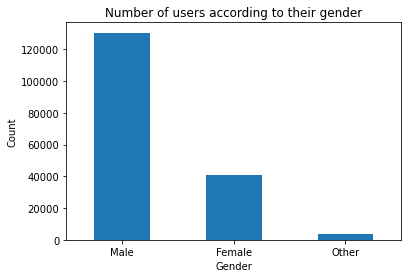

In [20]:
genders = df_copy['member_gender'].value_counts()
genders.plot.bar(rot=0);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title("Number of users according to their gender");

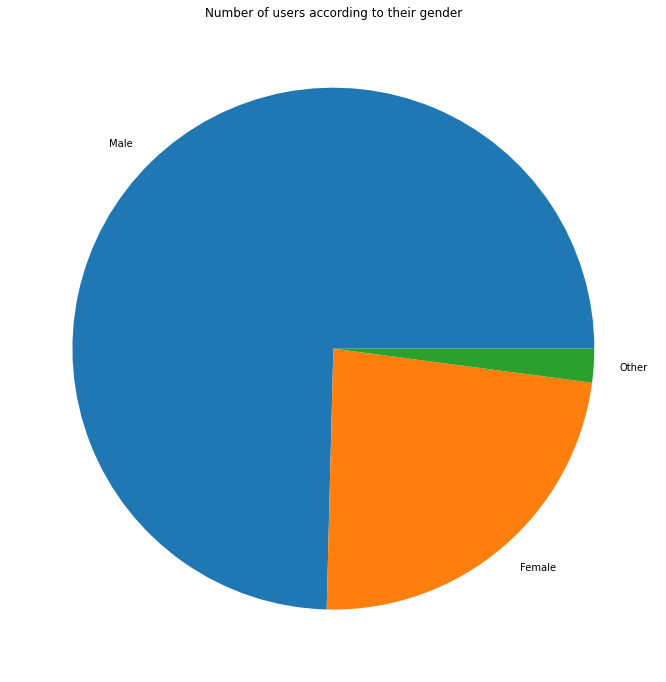

In [21]:
plt.figure(figsize=[15, 12])
labels = ['Male', 'Female', 'Other']
plt.pie(genders, labels = labels);
plt.title("Number of users according to their gender");

> the graphs above implies that male rides bike the most, follow by females then other

#### QUESTION
> what usertype is most common

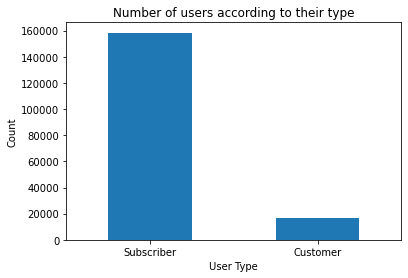

In [22]:
user_type = df_copy['user_type'].value_counts();
user_type.plot.bar(rot=0);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title("Number of users according to their type");

>The grapgh implies that the most common user type is the subscriber

#### QUESTION
> age range of the most users

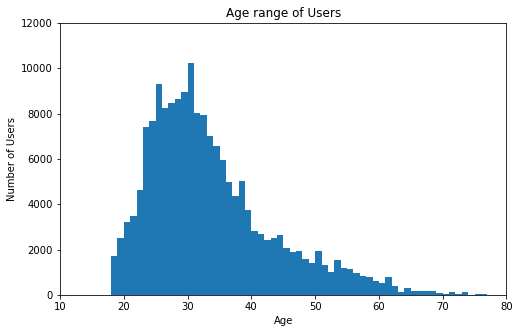

In [23]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df_copy['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Age range of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

>the graph implies that the users are within the age range of 20 to 40 years old.

#### QUESTION
> Is bike share a common thing among users

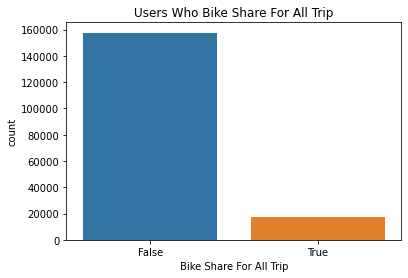

In [24]:
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip');
plt.xlabel('Bike Share For All Trip');
plt.title("Users Who Bike Share For All Trip");

> The bike share system  is not commonly used by the majority of users

#### QUESTION
> For how long do user ride bikes

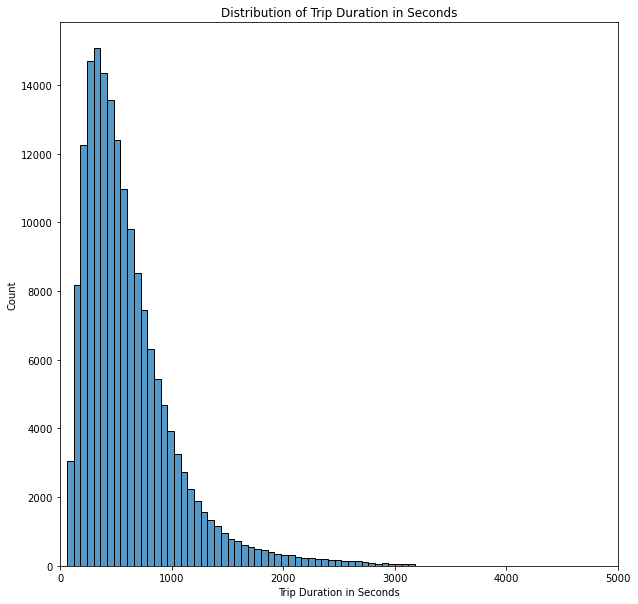

In [25]:
plt.figure(figsize=[10, 10])
bins = np.arange(df_copy['duration_sec'].min(), df_copy['duration_sec'].quantile(0.99) + 60, 60)
sb.histplot(data = df_copy, x='duration_sec', bins = bins);
plt.xlim(0, 5000);
plt.xlabel('Trip Duration in Seconds');
plt.title("Distribution of Trip Duration in Seconds");

>The trip duration (in seconds) is right skewed, It mostly between 50- 1000 seconds

#### Question
>which day do people takes bike most?

Text(0.5, 1.0, 'counts of days peoples takes the bike')

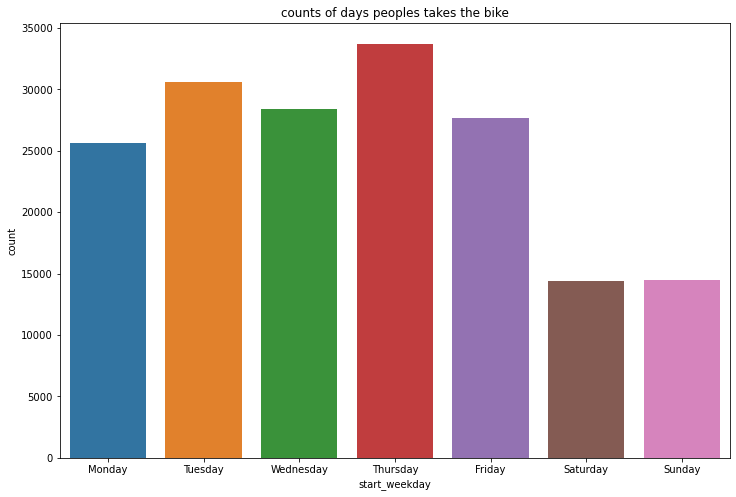

In [26]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df_copy['start_weekday'] = df_copy['start_weekday'].astype(vclasses)
plt.figure(figsize=(12,8))
sb.countplot(data = df_copy, x = 'start_weekday')
plt.title('counts of days peoples takes the bike')

>Most users ride bike on Thursdays

#### QUESTION
> What time of the day does users ride bike most

C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


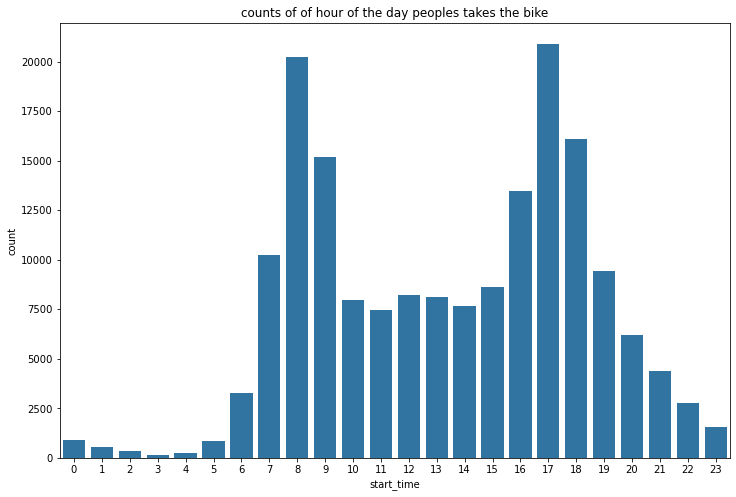

In [27]:
hour = df_copy['start_time'].apply(lambda x: int(str(x)[:2]))
plt.figure(figsize=(12,8))
color = sb.color_palette()[0]
sb.countplot(hour, color = color)
plt.title('counts of of hour of the day peoples takes the bike');

>the graph implies that hour of the day user rides bike the most is the 17hour

C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


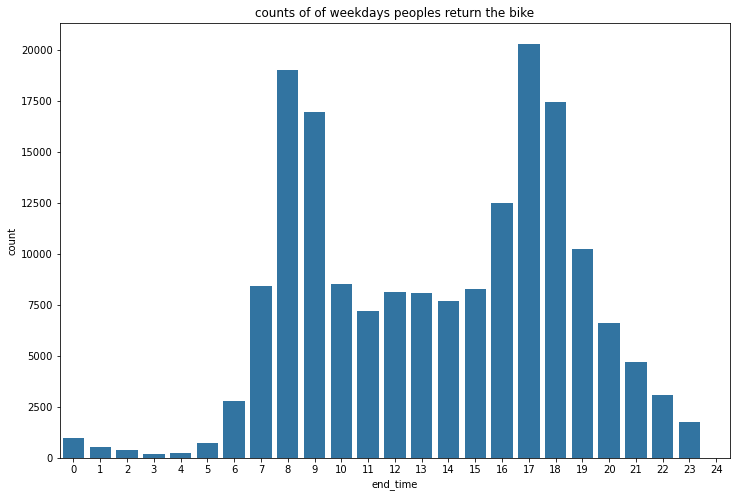

In [28]:
hour2 = df_copy['end_time'].apply(lambda x: int(str(x)[:2]))
plt.figure(figsize=(12,8))
color = sb.color_palette()[0]
sb.countplot(hour2, color = color, order= range(25))
plt.title('counts of of weekdays peoples return the bike');

C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


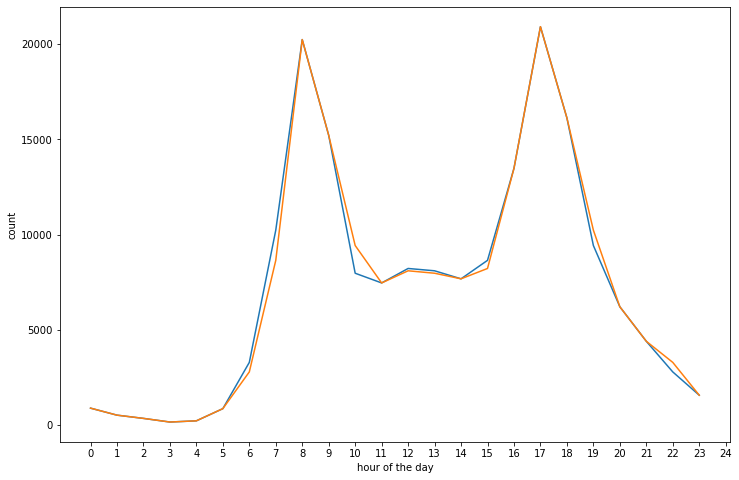

In [29]:
plt.figure(figsize=(12,8))
sb.lineplot(hour.value_counts().index, hour.value_counts())
sb.lineplot(hour2.value_counts().index, hour.value_counts())
plt.ylabel('count')
plt.xlabel('hour of the day')
plt.xticks(range(25));

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are more males than female in the dataset.
>The most common type of users is the Subscriber 
> The age range of most users in the dataset is betwwen the rfange of 20 to 40 years.
>The bike share system is not commonly used among users.
> Users tends to take bike trips more during working days than weekends.
> Most trips takes place between 7 - 9 AM and at 4 - 6 PM. Obviously, There are not many trips from 12 AM to 5 AM.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### QUESTION
>is hour that bikers takes most bike gender specific

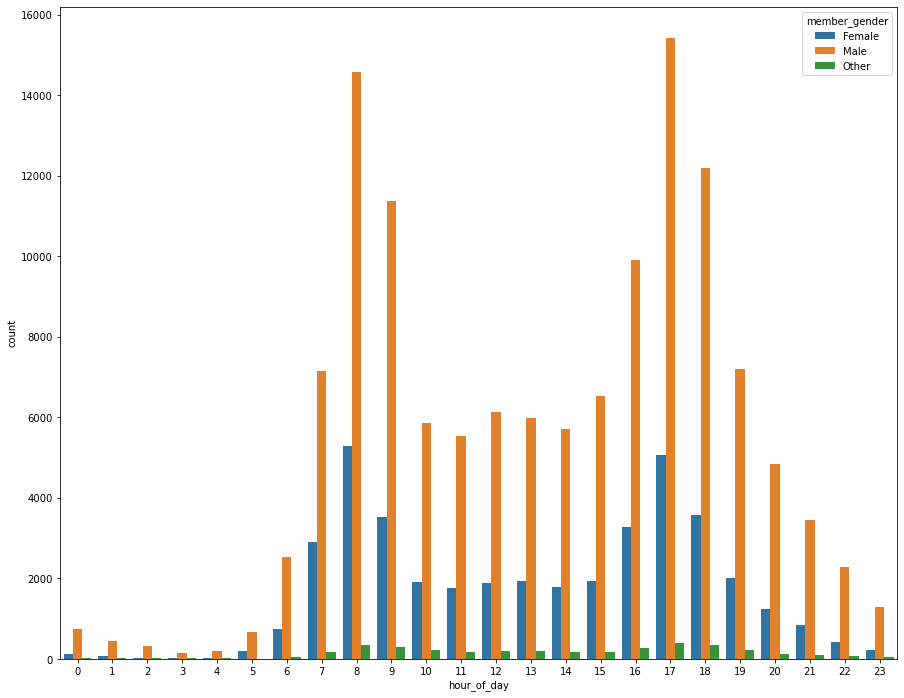

In [30]:
plt.figure(figsize=(15,12))
sb.countplot(data = df_copy, x = 'hour_of_day', hue = 'member_gender')
plt.xticks(range(24));

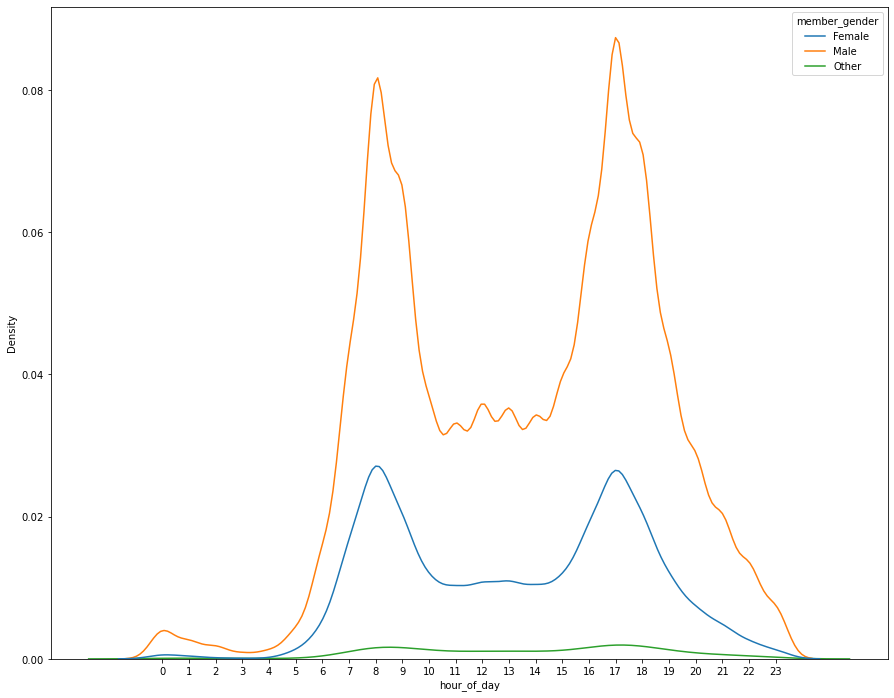

In [31]:
plt.figure(figsize=(15,12))
sb.kdeplot(data = df_copy, x = 'hour_of_day', hue = 'member_gender')
plt.xticks(range(24));

> gender has a little effect on time of the day which people takes bike

#### QUESTION
> duration Seconds gender specific

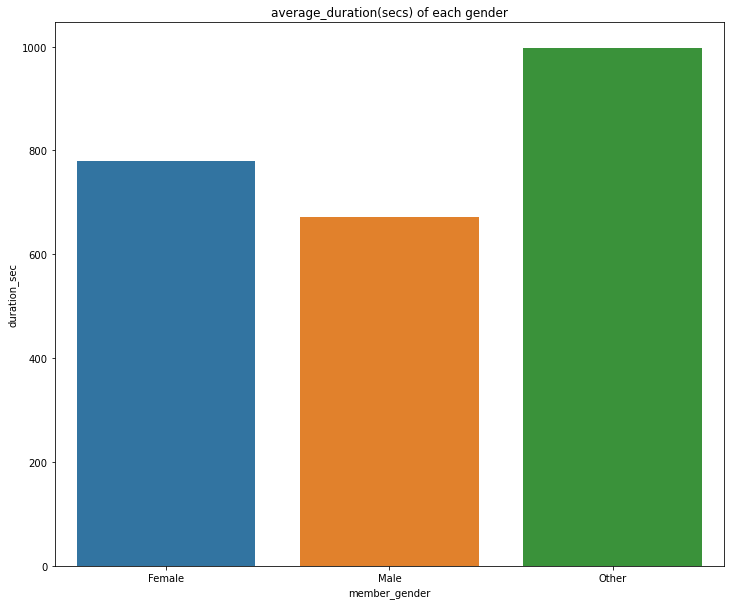

In [32]:
plt.figure(figsize = (12,10))
average_time = df_copy.groupby('member_gender')['duration_sec'].mean().apply(lambda x: round(x,0))
#average_time
sb.barplot(x = average_time.keys(), y = average_time)
plt.title('average_duration(secs) of each gender');

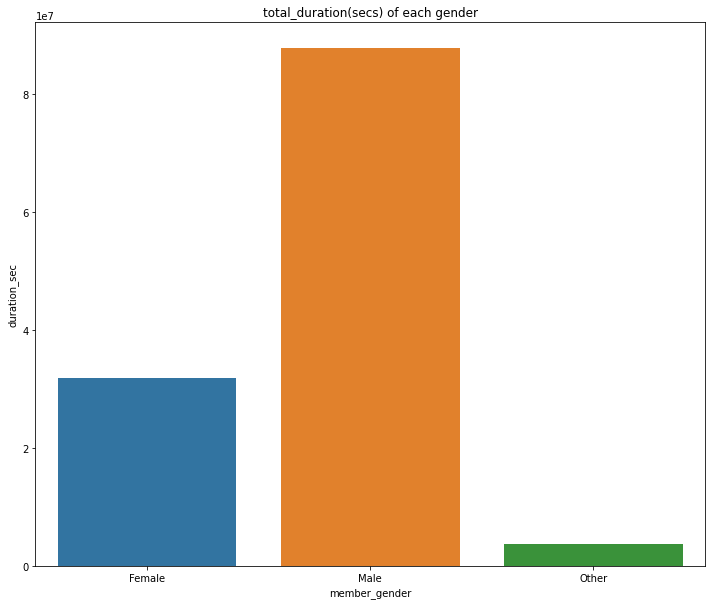

In [33]:
plt.figure(figsize = (12,10))
total_time = df_copy.groupby('member_gender')['duration_sec'].sum().apply(lambda x: round(x,0))
#total_time
sb.barplot(x = total_time.keys(), y = total_time)
plt.title('total_duration(secs) of each gender');

>  the total_duration(secs) of male is higher than that of female and others, but average_time spent by each biker on other gender is higher and that of males are the least

#### QUESTION
> Rate of gender that uses the bike sharing system

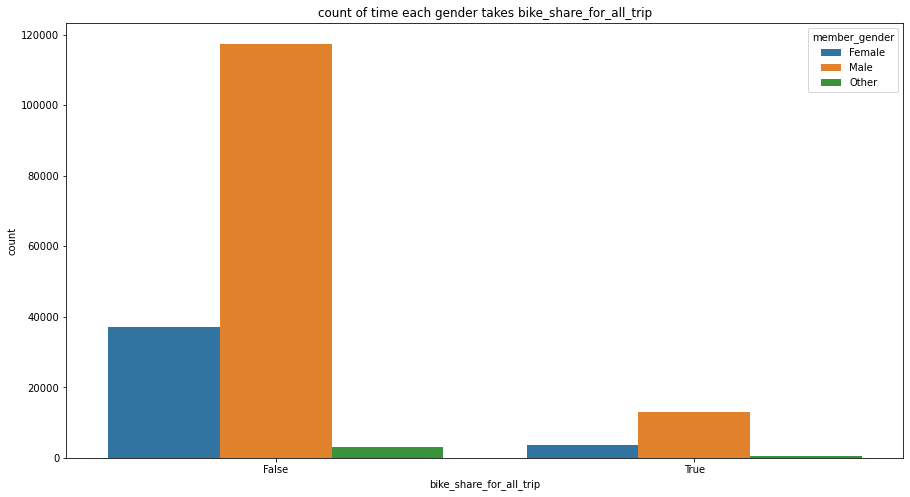

In [34]:
plt.figure(figsize = (15,8))
sb.countplot(data = df_copy, x= 'bike_share_for_all_trip' , hue = 'member_gender' )
plt.title('count of time each gender takes bike_share_for_all_trip');

> male has the most total number who shared bike for all trip

#### QUESTION
> Which usertype uses the most time during trip duration

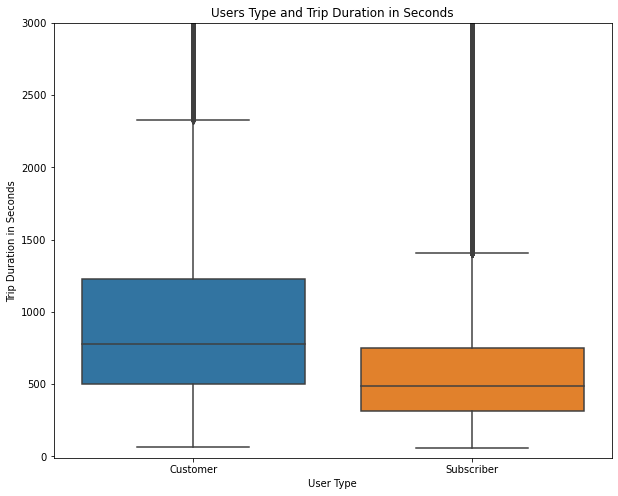

In [35]:
plt.figure(figsize=[10, 8])
sb.boxplot(data = df_copy, x='user_type', y='duration_sec');
plt.ylim(-10, 3000);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Seconds');
plt.title('Users Type and Trip Duration in Seconds');

> Customers spends more time in their bike trips more than subscribers.

#### QUESTION
>which gender is more in each usertype

Text(0.5, 1.0, 'Users Birth Year and Trip Duration in Seconds')

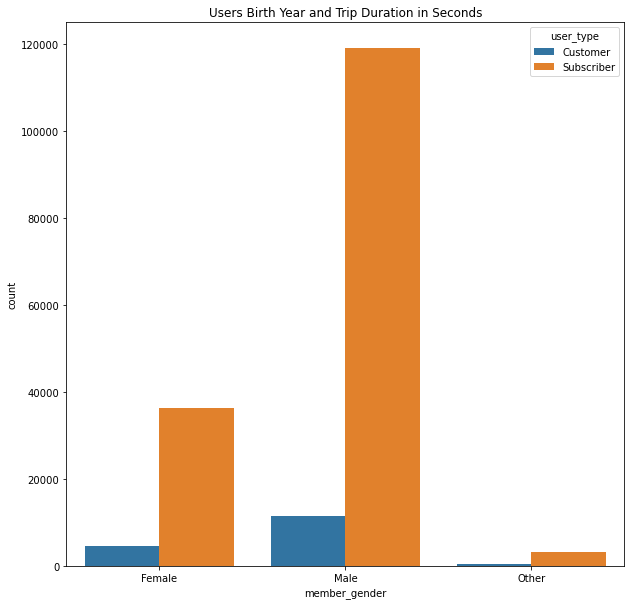

In [36]:
plt.figure(figsize = [10, 10]);

sb.countplot(data = df_copy, x = 'member_gender', hue = 'user_type');

plt.title('Users Birth Year and Trip Duration in Seconds')

> Subscribed users numbers are way more greater than customers despite of the gender.

#### QUESTION
>Those Age of user relate with duration of trip

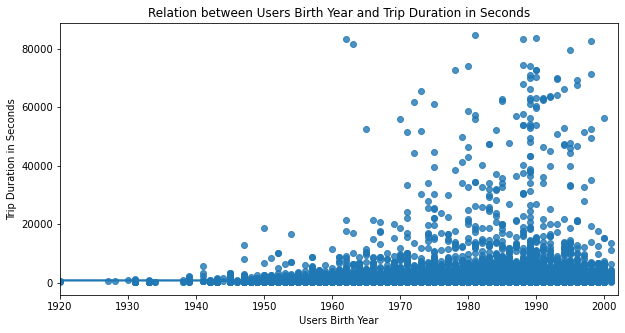

In [37]:
plt.figure(figsize=[10, 5])
sb.regplot(data = df_copy, x='member_birth_year', y='duration_sec');
plt.xlim(1920, 2002);
plt.xlabel('Users Birth Year');
plt.ylabel('Trip Duration in Seconds');
plt.title('Relation between Users Birth Year and Trip Duration in Seconds');

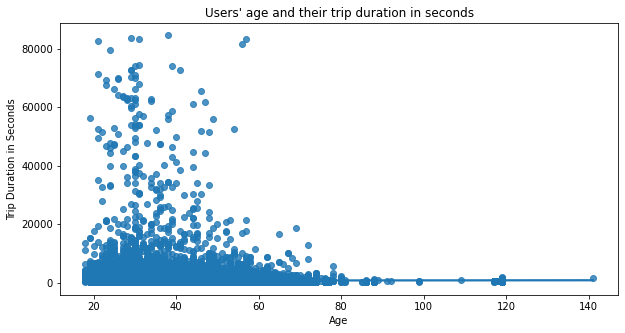

In [38]:
plt.figure(figsize=[10, 5])
sb.regplot(data = df_copy, x='age', y='duration_sec');
plt.xlabel('Age');
plt.ylabel('Trip Duration in Seconds');
plt.title('Users\' age and their trip duration in seconds');

> that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

In [39]:
#pip install plotly

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> gender has a little effect on time of the day which users takes bike
> the total_duration(secs) of male is higher than that of female and others, but average_time spent by each biker on other gender is higher and that of males are the least
> male has the most total number who shared bike for all trip and most total number of who did not shared bike for all trip
> Customers spends more time in their bike trips more than subscribers.
> Subscribed users numbers are way more greater than customers despite of the gender.
> most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### QUESTION
>Relation between age and trip duration for each user type

In [40]:
df_sample = df_copy.sample(20000, random_state=1)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 68734 to 76932
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             20000 non-null  int64   
 1   start_time               20000 non-null  object  
 2   end_time                 20000 non-null  object  
 3   start_station_id         20000 non-null  float64 
 4   start_station_name       20000 non-null  object  
 5   start_station_latitude   20000 non-null  float64 
 6   start_station_longitude  20000 non-null  float64 
 7   end_station_id           20000 non-null  float64 
 8   end_station_name         20000 non-null  object  
 9   end_station_latitude     20000 non-null  float64 
 10  end_station_longitude    20000 non-null  float64 
 11  bike_id                  20000 non-null  int64   
 12  user_type                20000 non-null  category
 13  member_birth_year        20000 non-null  float64 
 14  me

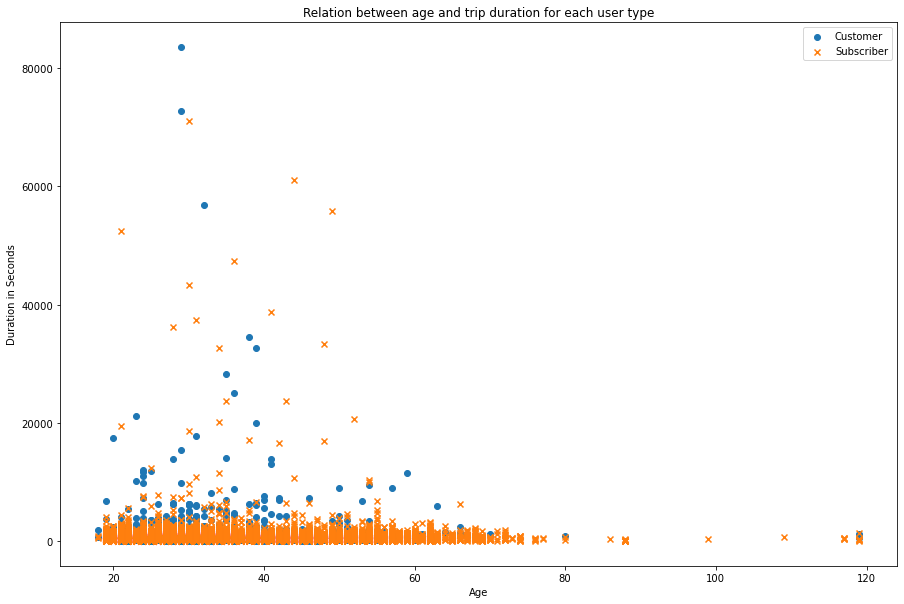

In [41]:
df_sample = df_copy.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df_sample[df_sample['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker);
    
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Duration in Seconds');
plt.title("Relation between age and trip duration for each user type");

> The majority of older users are Subscribers and they spend little time in their bike trips.
> Younger Customers trip duration is slightly more than younger subscribers.

<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

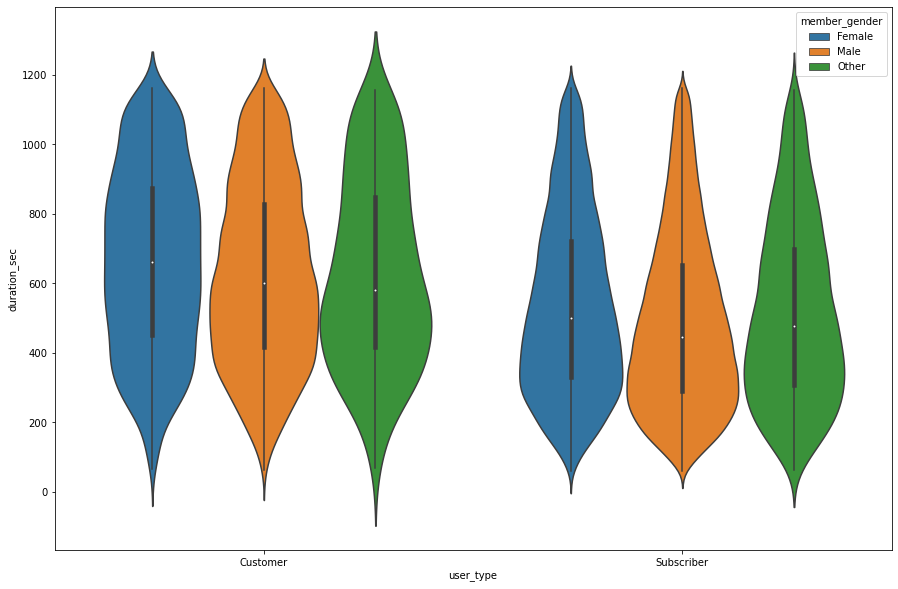

In [42]:
low, high = df_copy["duration_sec"].quantile([0, 0.9])
mask_dist = df_copy["duration_sec"].between(low, high)
df_small = df_copy[mask_dist]
plt.figure(figsize=(15,10))
sb.violinplot(x="user_type",
                  y="duration_sec",
                  hue="member_gender",
                  data=df_small)

>it can be seen from the violin plot that Subscribers has lower duration time than Customer, Female also have higher duration_sec and male has the least

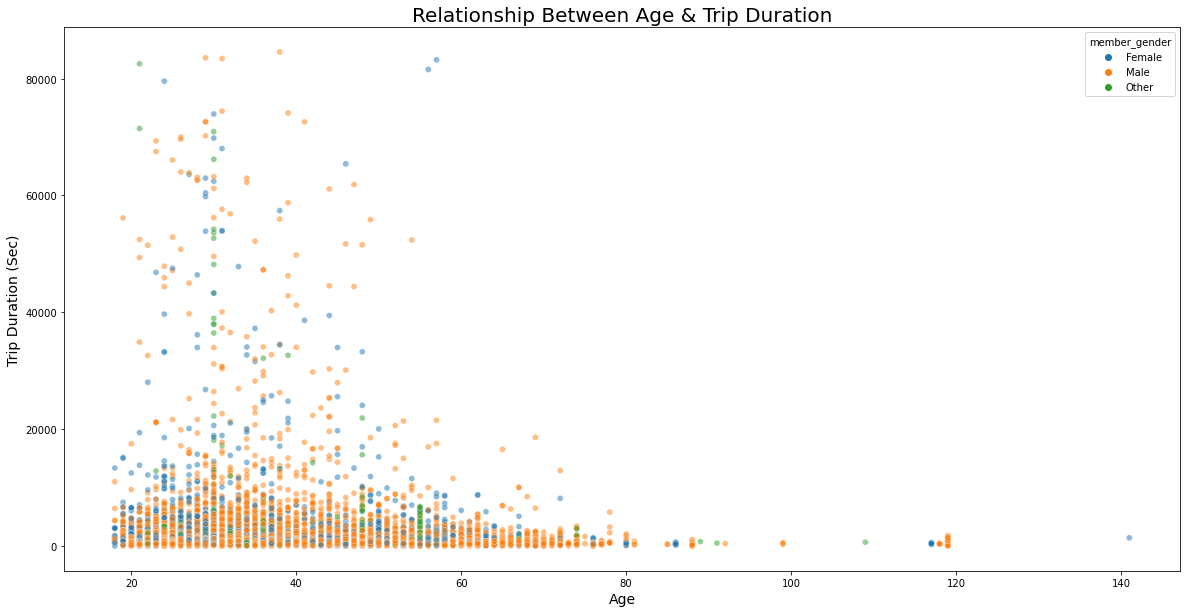

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sb.scatterplot(data=df_copy, y=df_copy['duration_sec'], x=df_copy['age'], hue='member_gender', alpha=0.5)
plt.title('Relationship Between Age & Trip Duration', fontsize=20)
plt.ylabel('Trip Duration (Sec)', fontsize=14)
plt.xlabel('Age', fontsize=14);

> Trips duration is highest at age range from 20 to 40 as expected as they are the most users

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> The majority of older users are Subscribers and they spend little time in their bike trips.
> Younger Customers trip duration is slightly more than younger subscribers.
> Subscribers has lower duration time than Customer, Female also have higher duration_sec and male has the least
> Trips duration is highest at age range from 20 to 40 as expected as they are the most users

### Were there any interesting or surprising interactions between features?


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.


In [44]:
# Save the wrangled dataframe for visualization in the presentation.
df_copy.to_csv('201902-fordgobike-tripdata-clean.csv')